In [1]:
G = []
H = []

In [2]:
G.append([
    [0, 1, 0, 0],
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [0, 0, 1, 0]
])
H.append([
    [0, 1, 1, 1],
    [1, 0, 0, 0],
    [1, 0, 0, 0],
    [1, 0, 0, 0]
])

In [3]:
G.append([
    [0, 1, 1, 0, 0],
    [1, 0, 1, 1, 0],
    [1, 1, 0, 0, 1],
    [0, 1, 0, 0, 1],
    [0, 0, 1, 1, 0]
])
H.append([
    [0, 1, 0, 0, 0],
    [1, 0, 1, 1, 0],
    [0 ,1, 0, 0, 1],
    [0, 1, 0, 0, 1],
    [0, 0, 1, 1, 0]
])

In [4]:
G.append([
    [0, 1, 0, 1],
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [1, 0, 1, 0]
])
H.append([
    [0, 1, 0, 1],
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [1, 0, 1, 0]
])

In [5]:
G.append([
    [0, 1, 1, 1, 1, 1],
    [1, 0, 1, 1, 1, 1],
    [1, 1, 0, 1, 1, 1],
    [1, 1, 1, 0, 1, 1],
    [1, 1, 1, 1, 0, 1],
    [1, 1, 1, 1, 1, 0]
])
H.append([
    [0, 1, 1, 1, 1, 1],
    [1, 0, 1, 1, 1, 1],
    [1, 1, 0, 1, 1, 1],
    [1, 1, 1, 0, 1, 1],
    [1, 1, 1, 1, 0, 1],
    [1, 1, 1, 1, 1, 0]
])

In [6]:
G.append([
    [0, 1, 1, 0],
    [1, 0, 0, 1],
    [1, 0, 0, 1],
    [0, 1, 1, 0]
])
H.append([
    [0, 1, 1, 0, 0],
    [1, 0, 0, 0, 1], 
    [1, 0, 0, 0, 1],
    [0, 0, 0, 0, 0],
    [0, 1, 1, 0, 0]
])

In [7]:
from itertools import permutations
import networkx as nx

In [8]:
def get_number_of_edges(graph: list[list[int]]):
    return sum(sum(row) for row in graph) // 2

def get_list_of_degrees(graph: list[list[int]]):
    return list(map(sum, graph))

def are_graphs_isomorphic(G: list[list[int]], H: list[list[int]]):

    # Number of vertexs
    if len(G) != len(H):
        return False
    
    # Number of edges
    edgesG = get_number_of_edges(graph=G)
    edgesH = get_number_of_edges(graph=H)
    if edgesG != edgesH:
        return False
    
    # Vertex degrees
    degreesG = get_list_of_degrees(graph=G)
    degreesH = get_list_of_degrees(graph=H)
    if sorted(degreesG) != sorted(degreesH):
        return False
    
    # Check every graph permutations
    for permutation in permutations(range(len(H))):
        if all(G[i][j] == H[permutation[i]][permutation[j]] for i in range(len(G)) for j in G[i]):
            return True

    return False

Complexity (n!n²):
    - Generate all permutations (n!)
    - Check if an adjacency matrix is equal to other (n²)

In [9]:
for g, h in zip(G, H):
    print(are_graphs_isomorphic(g, h))

False
False
True
True
False


In [10]:
# Get Jaccard similatiry of one node from G and one node from H
def jaccard_similarity(G, H, node1, node2):
    neighbors1 = set(G.neighbors(node1)) | {node1}
    neighbors2 = set(H.neighbors(node2)) | {node2}
    intersection = len(neighbors1 & neighbors2)
    union = len(neighbors1 | neighbors2)
    return intersection / union if union != 0 else 0

# Get Mean Jaccard Similatiry of G and H
def average_jaccard_similarity(G, H):
    total_similarity = 0
    count = 0
    for node1, node2 in zip(G.nodes(), H.nodes()):
        total_similarity += jaccard_similarity(G, H, node1, node2)
        count += 1
    return total_similarity / count if count else 0

# Permutate H and test all permutations to get the best similatiry
def best_similarity(G, H):
    best_similarity_score = 0
    
    for permutation in permutations(H.nodes()):
        H_permuted = nx.relabel_nodes(H, {old_label:new_label for old_label, new_label in zip(H.nodes(), permutation)})
        
        current_similarity = average_jaccard_similarity(G, H_permuted)
        
        if current_similarity > best_similarity_score:
            best_similarity_score = current_similarity
    
    return True if best_similarity_score >= 0.75 else False

# Convert matrix to NetworkX graph object
def generate_graph(matrix: list[list[int]]):
    G = nx.Graph()
    for i,row in enumerate(matrix):
        for j, value in enumerate(row):
            if(matrix[i][j] == 1):
                G.add_edge(i+1,j+1)
    return G


In [11]:
for g, h in zip(G, H):
    print(best_similarity(generate_graph(g), generate_graph(h)))

False
True
True
True
False


In [12]:
import numpy as np
import matplotlib.pyplot as plt

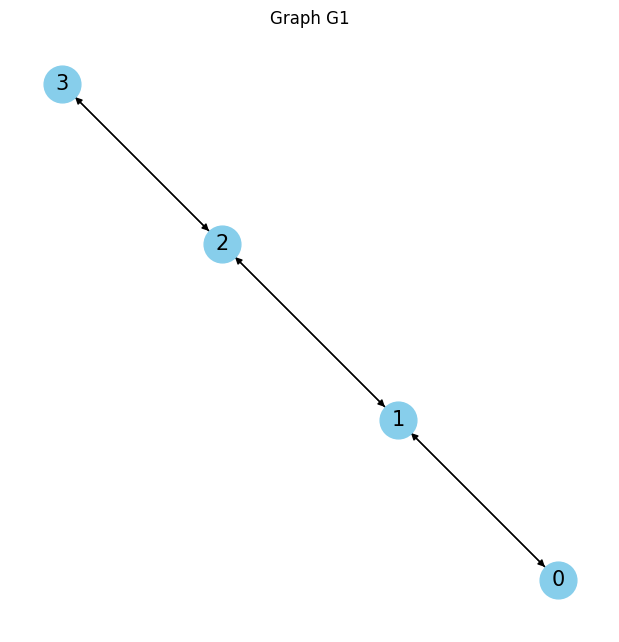

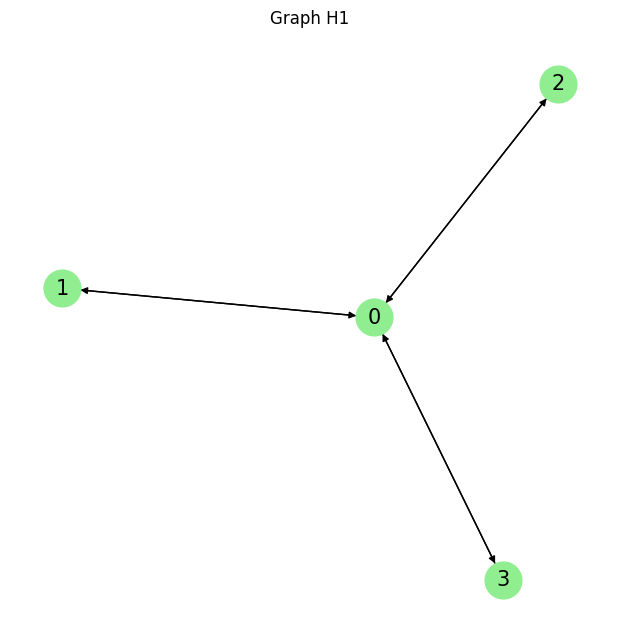

In [13]:
G1_graph = nx.DiGraph(np.array(G[0]))
H1_graph = nx.DiGraph(np.array(H[0]))

plt.figure(figsize=(6, 6))
nx.draw(G1_graph, with_labels=True, node_color='skyblue', node_size=700, font_size=15)
plt.title("Graph G1")
plt.savefig('G1.pdf')  # Saves the figure as a PDF file
plt.show()

plt.figure(figsize=(6, 6))
nx.draw(H1_graph, with_labels=True, node_color='lightgreen', node_size=700, font_size=15)
plt.title("Graph H1")
plt.savefig('H1.pdf')
plt.show()

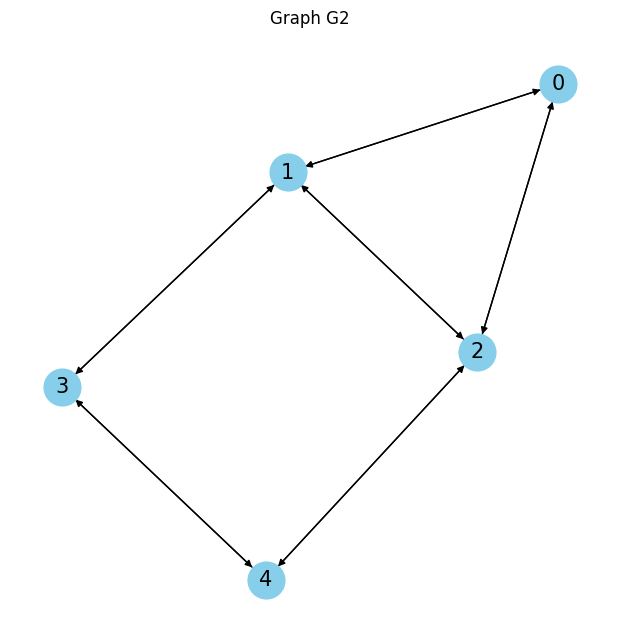

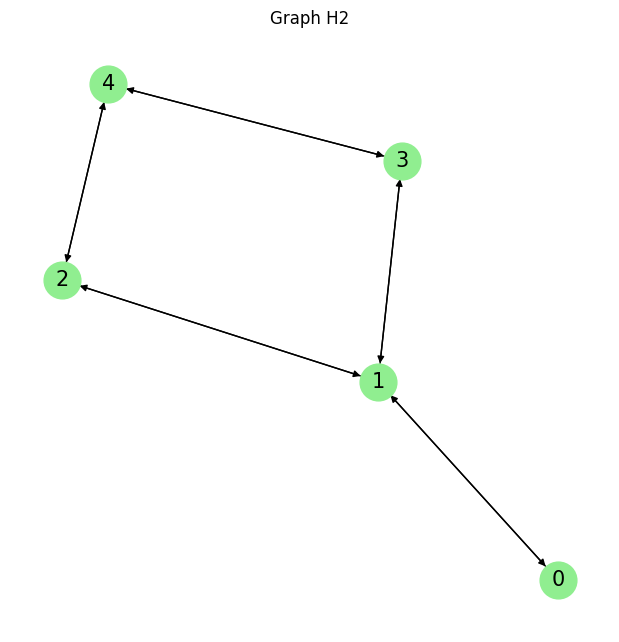

In [14]:
G2_graph = nx.DiGraph(np.array(G[1]))
H2_graph = nx.DiGraph(np.array(H[1]))

plt.figure(figsize=(6, 6))
nx.draw(G2_graph, with_labels=True, node_color='skyblue', node_size=700, font_size=15)
plt.title("Graph G2")
plt.savefig('G2.pdf')
plt.show()

plt.figure(figsize=(6, 6))
nx.draw(H2_graph, with_labels=True, node_color='lightgreen', node_size=700, font_size=15)
plt.title("Graph H2")
plt.savefig('H2.pdf')
plt.show()
plt.show()

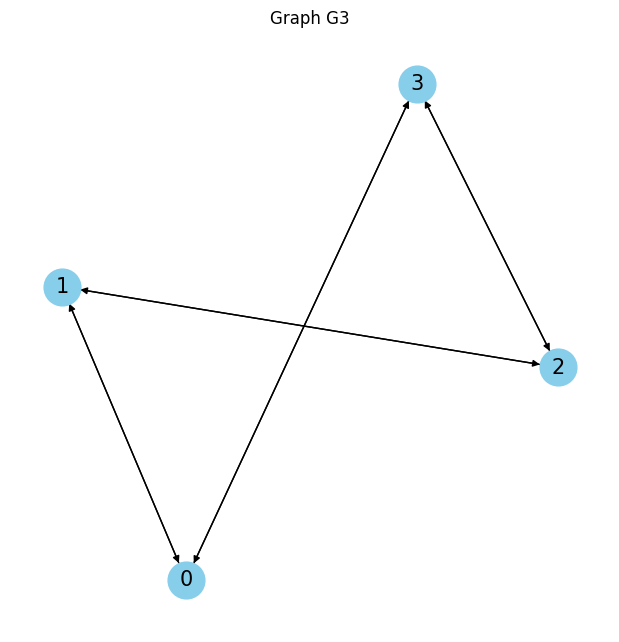

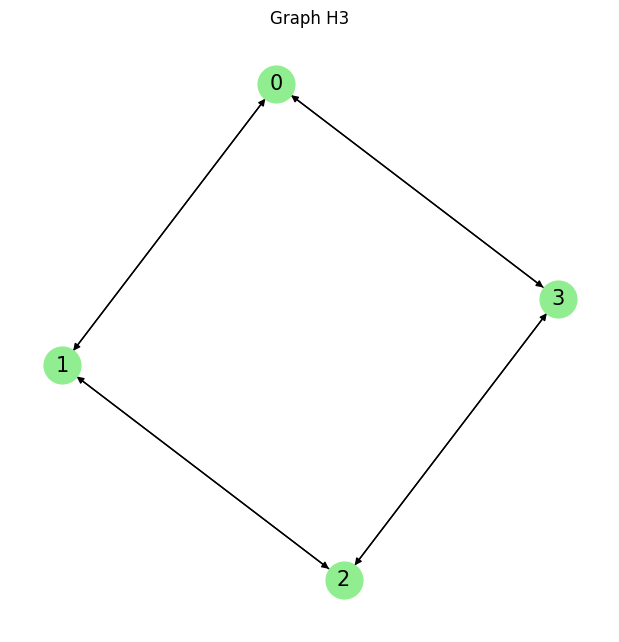

In [15]:
G3_graph = nx.DiGraph(np.array(G[2]))
H3_graph = nx.DiGraph(np.array(H[2]))

plt.figure(figsize=(6, 6))
nx.draw(G3_graph, with_labels=True, node_color='skyblue', node_size=700, font_size=15)
plt.title("Graph G3")
plt.savefig('G3.pdf')
plt.show()

plt.figure(figsize=(6, 6))
nx.draw(H3_graph, with_labels=True, node_color='lightgreen', node_size=700, font_size=15)
plt.title("Graph H3")
plt.savefig('H3.pdf')
plt.show()

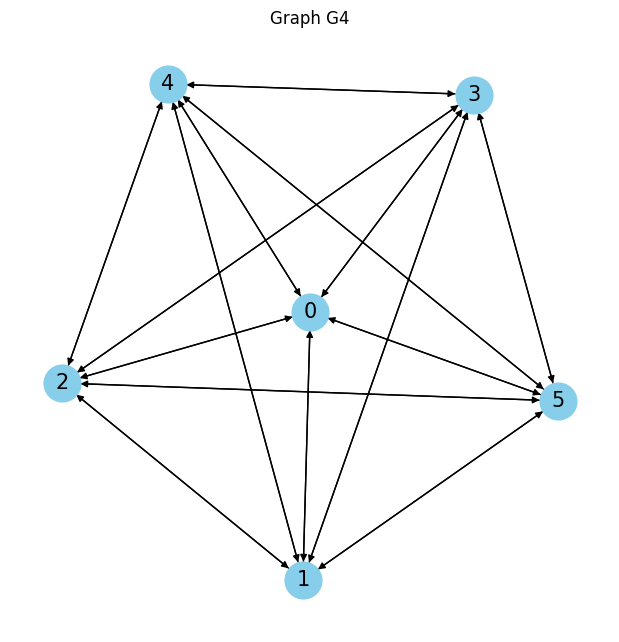

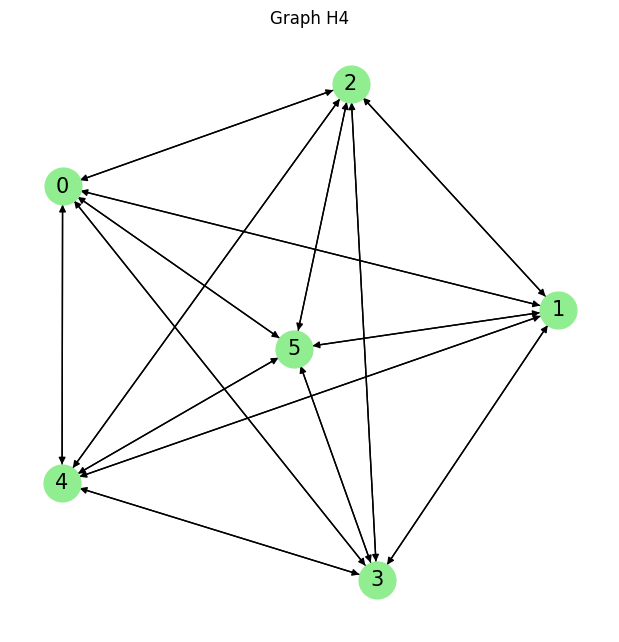

In [16]:
G4_graph = nx.DiGraph(np.array(G[3]))
H4_graph = nx.DiGraph(np.array(H[3]))

plt.figure(figsize=(6, 6))
nx.draw(G4_graph, with_labels=True, node_color='skyblue', node_size=700, font_size=15)
plt.title("Graph G4")
plt.savefig('G4.pdf')
plt.show()

plt.figure(figsize=(6, 6))
nx.draw(H4_graph, with_labels=True, node_color='lightgreen', node_size=700, font_size=15)
plt.title("Graph H4")
plt.savefig('H4.pdf')
plt.show()

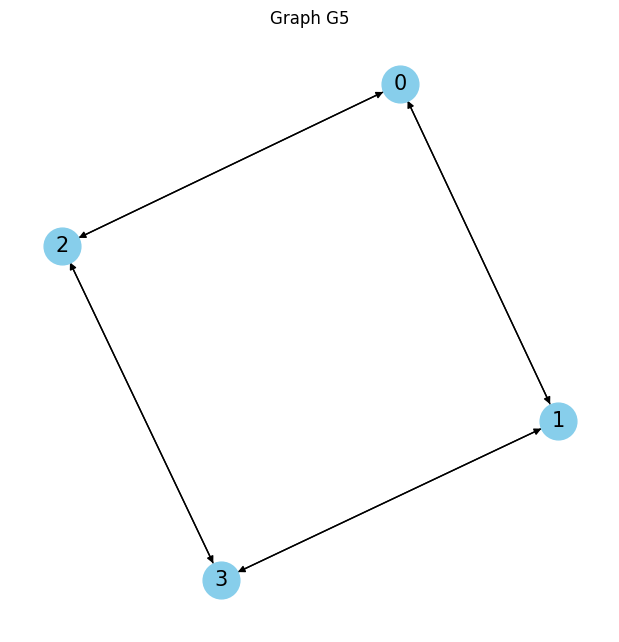

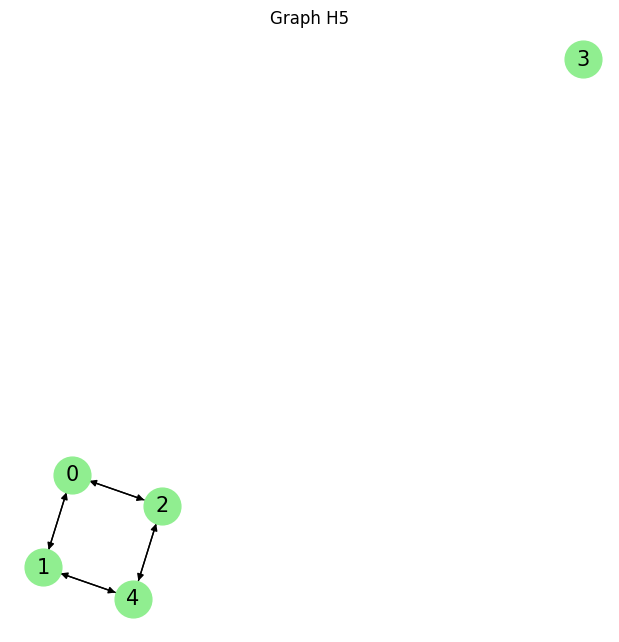

In [17]:
G5_graph = nx.DiGraph(np.array(G[4]))
H5_graph = nx.DiGraph(np.array(H[4]))

plt.figure(figsize=(6, 6))
nx.draw(G5_graph, with_labels=True, node_color='skyblue', node_size=700, font_size=15)
plt.title("Graph G5")
plt.savefig('G5.pdf')
plt.show()

plt.figure(figsize=(6, 6))
nx.draw(H5_graph, with_labels=True, node_color='lightgreen', node_size=700, font_size=15)
plt.title("Graph H5")
plt.savefig('H5.pdf')
plt.show()